In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotel=pd.read_csv("D:/Exercises and Datasources/Datasets/Hotel Reservations/Hotel Reservations.csv")

In [3]:
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
hotel.shape

(36275, 19)

Overview of the columns:

Booking_ID: This is likely a unique identifier for each booking.

no_of_adults: The number of adults included in the reservation.

no_of_children: The number of children included in the reservation.

no_of_weekend_nights: The number of nights stayed over a weekend.

no_of_week_nights: The number of nights stayed during the week.

type_of_meal_plan: The type of meal plan selected for the stay.

required_car_parking_space: Indicates if a car parking space is required.

room_type_reserved: The type of room reserved.

lead_time: The number of days between the booking and the stay.

arrival_year: The year of arrival.

arrival_month: The month of arrival.

arrival_date: The date of arrival.

market_segment_type: The market segment from which the booking originated.

repeated_guest: Indicates if the guest has previously stayed at the hotel.

no_of_previous_cancellations: The number of previous bookings that were canceled by the customer.

no_of_previous_bookings_not_canceled: The number of previous bookings not canceled.

avg_price_per_room: The average price per room for the stay.

no_of_special_requests: The number of special requests made by the guest.

booking_status: The status of the booking (e.g., canceled, not canceled).

In [5]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
hotel.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No null values are present in the dataset

In [7]:
hotel.duplicated().sum()

0

No duplicates found either

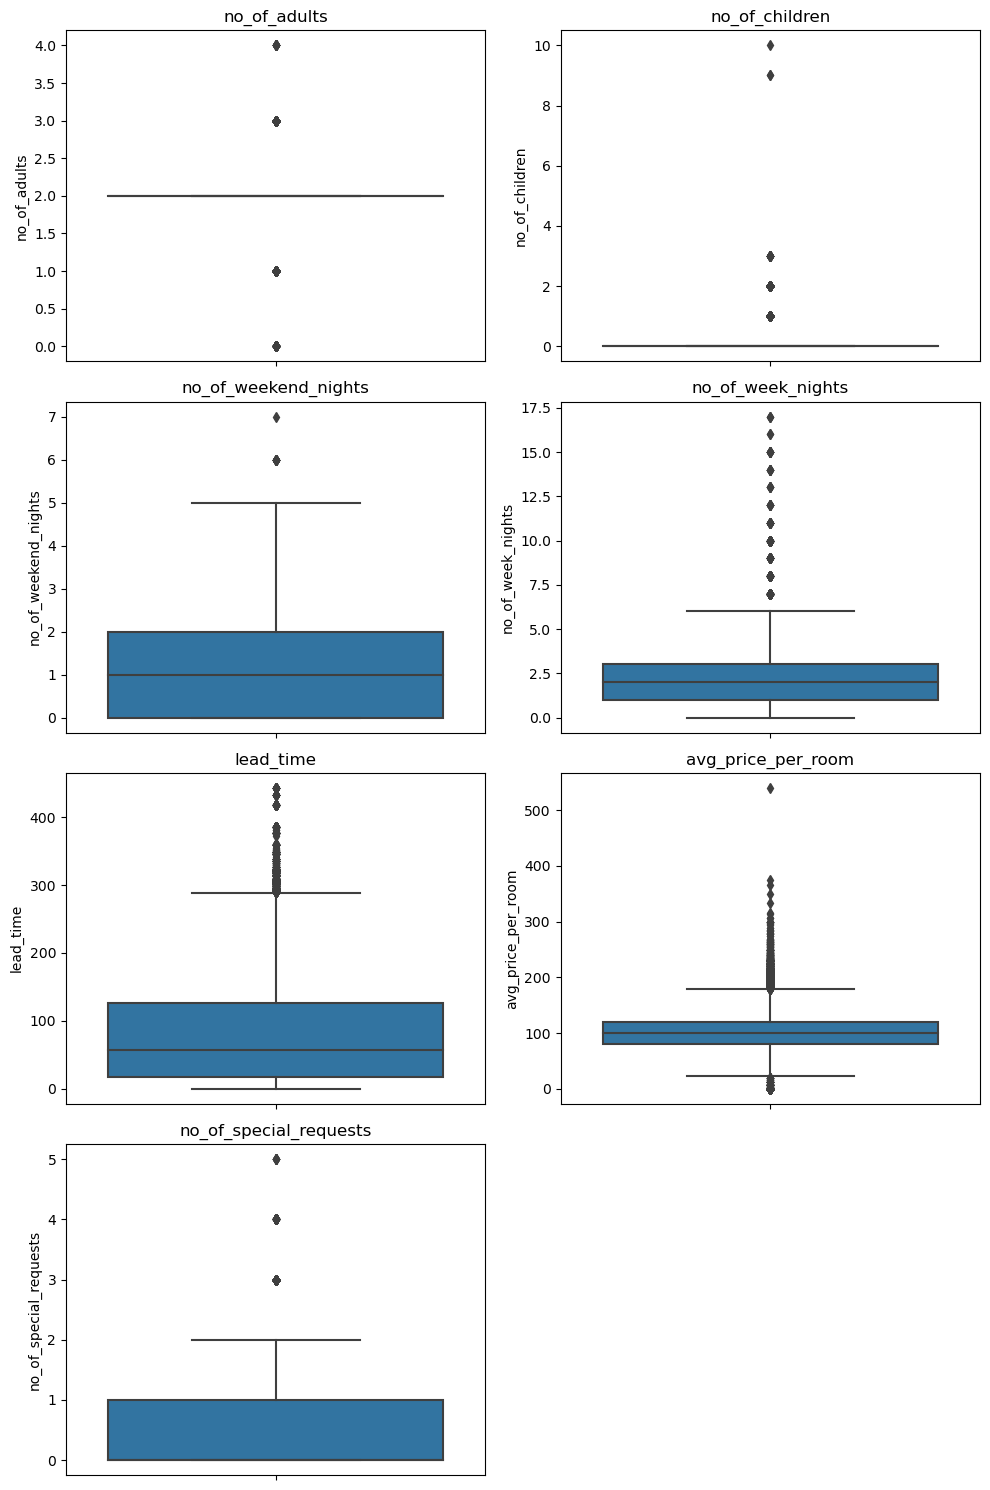

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,85.232557,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,85.930817,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,540.000000,5.000000


In [8]:

numerical_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                     'lead_time', 'avg_price_per_room', 'no_of_special_requests']

# Statistical summary of the numerical columns
statistical_summary = hotel[numerical_columns].describe()

# Creating boxplots for each numerical column
plt.figure(figsize=(10, 15))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 2, i+1)
    sns.boxplot(y=hotel[column])
    plt.title(column)

plt.tight_layout()
plt.show()

statistical_summary



There are Outliers in the data but they seem to be consistent with the Data

In [9]:
hotel.describe(include='O')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


Investigating Categorical columnns

In [10]:
# Identifying categorical columns
categorical_columns = hotel.select_dtypes(include=['object', 'category']).columns

# Getting unique values in each categorical column

for column in categorical_columns:
    print('---------------------------------')
    print(f"The Unique values in {column } are :{hotel[column].unique()}")


---------------------------------
The Unique values in Booking_ID are :['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
---------------------------------
The Unique values in type_of_meal_plan are :['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
---------------------------------
The Unique values in room_type_reserved are :['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
---------------------------------
The Unique values in market_segment_type are :['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
---------------------------------
The Unique values in booking_status are :['Not_Canceled' 'Canceled']


Based on the checks performed,the assessment of the "hotel" dataset's cleanliness is as follows:

Missing Values: There are no missing values in any of the columns, which is a good sign of data completeness.

Duplicate Entries: There are no duplicate rows in the dataset, indicating uniqueness in the data entries.

Data Types: The data types for each column seem appropriate

Consistency in Categorical Data: The unique values in the categorical columns appear consistent and correctly formatted. There are no apparent typos or different representations of the same category.



# Exploratory Data Analysis

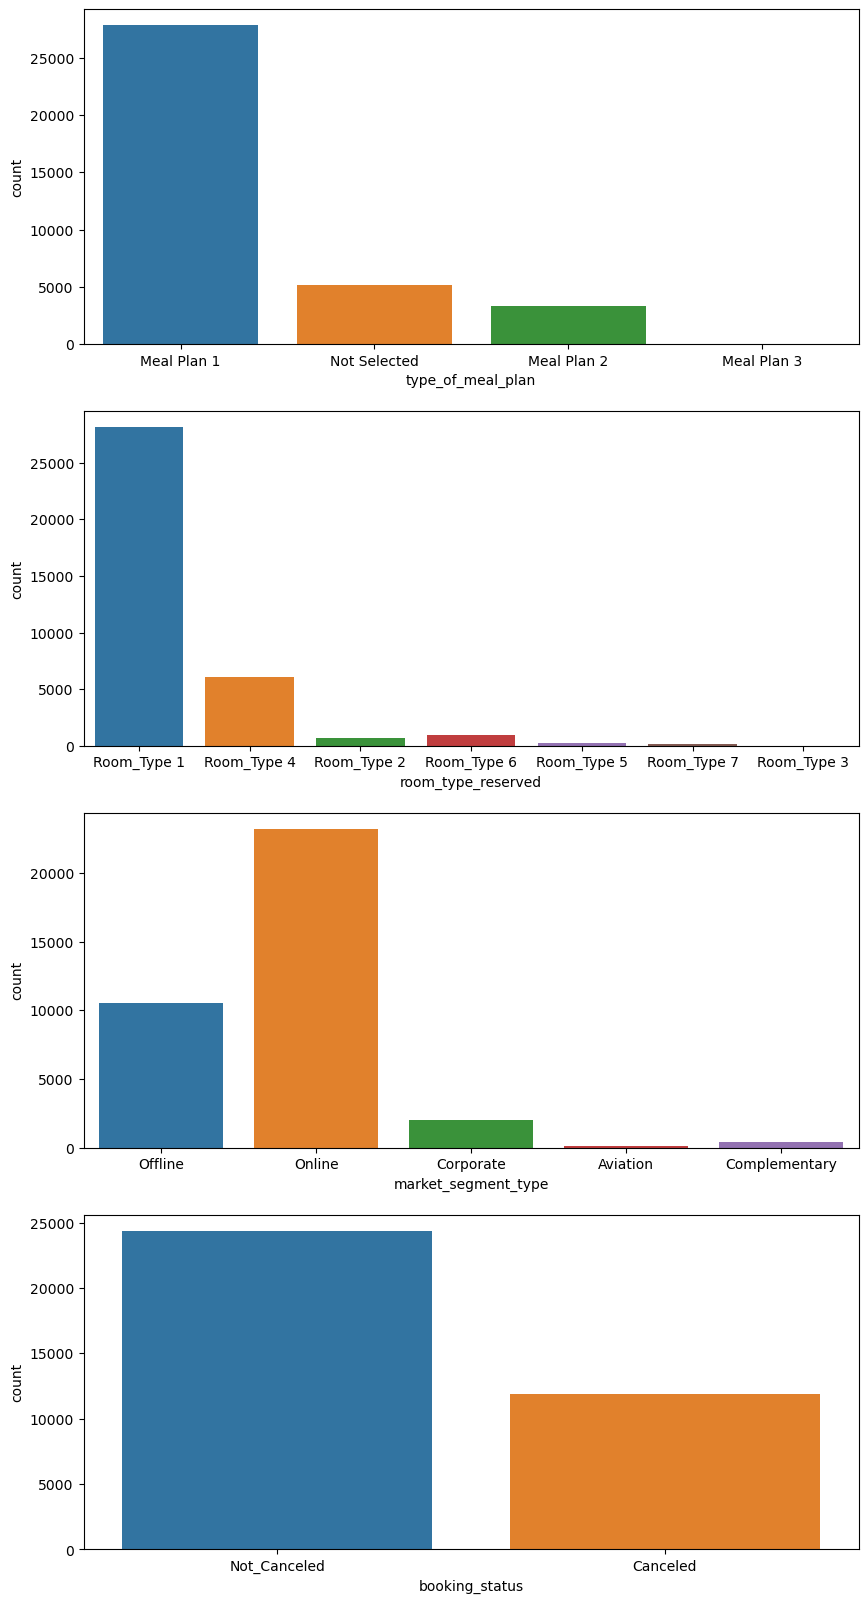

In [11]:
fig,ax=plt.subplots(4,1,figsize=(10,20))
sns.countplot(data=hotel,x='type_of_meal_plan',ax=ax[0])
sns.countplot(data=hotel,x='room_type_reserved',ax=ax[1])
sns.countplot(data=hotel,x='market_segment_type',ax=ax[2])
sns.countplot(data=hotel,x='booking_status',ax=ax[3])
plt.show()


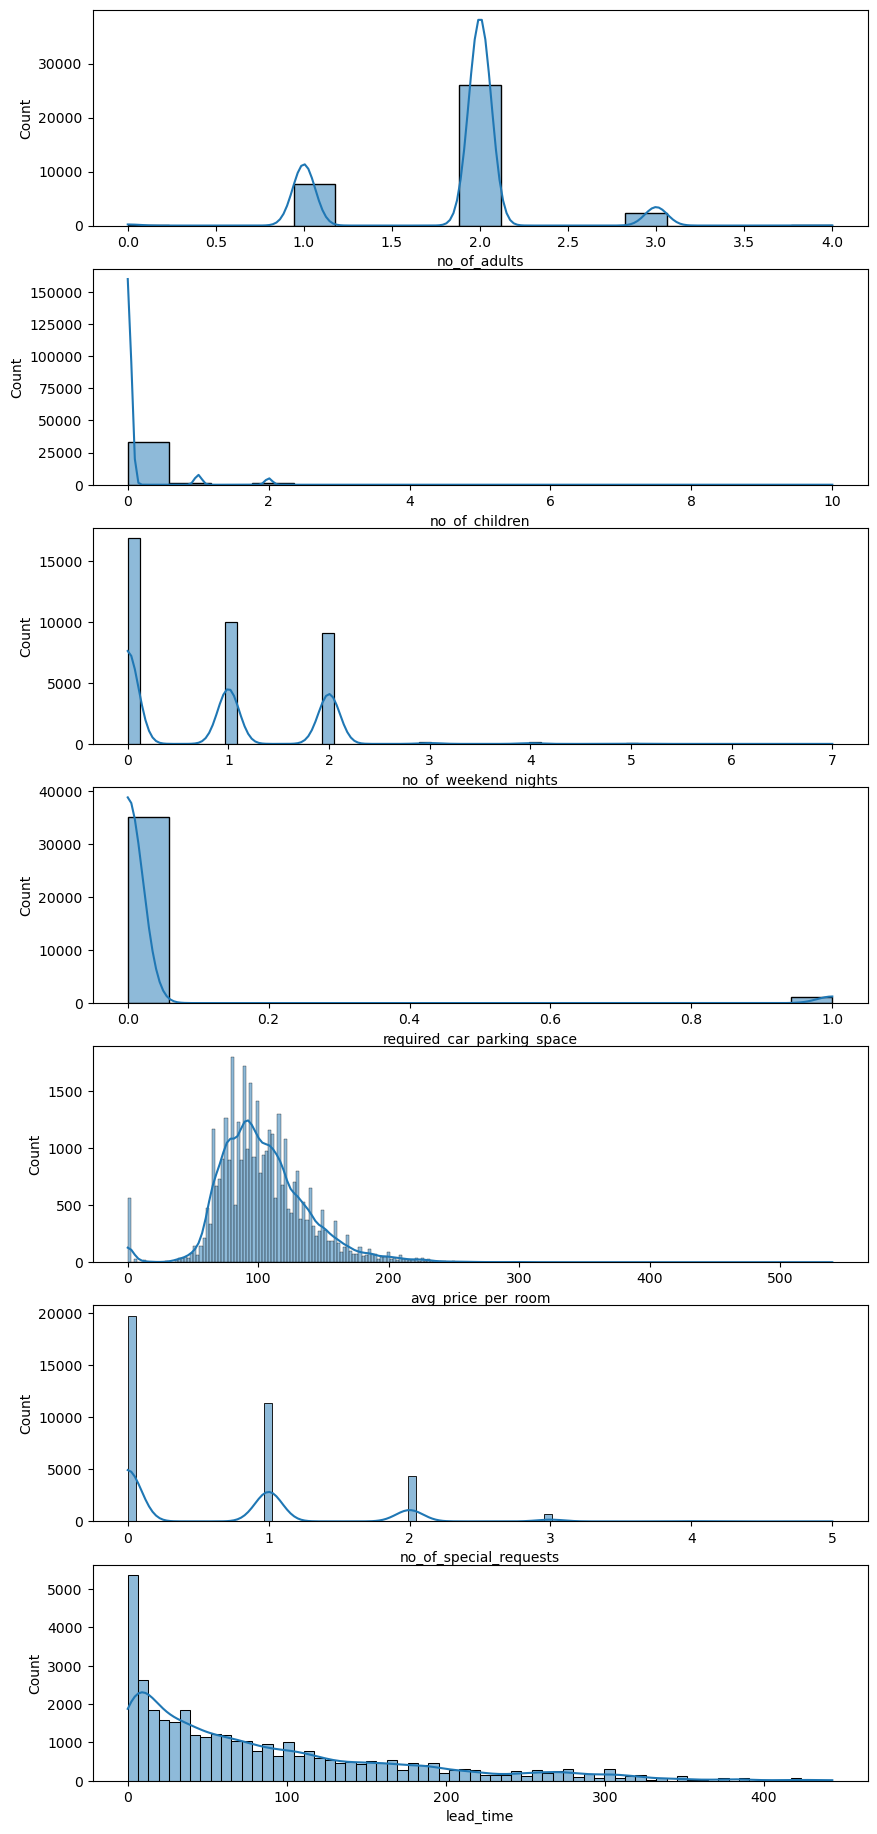

In [12]:
fig,ax=plt.subplots(7,1,figsize=(10,23))
sns.histplot(data=hotel,x='no_of_adults',kde=True,ax=ax[0])
sns.histplot(data=hotel,x='no_of_children',kde=True,ax=ax[1])
sns.histplot(data=hotel,x='no_of_weekend_nights',kde=True,ax=ax[2])
sns.histplot(data=hotel,x='required_car_parking_space',kde=True,ax=ax[3])
sns.histplot(data=hotel,x='avg_price_per_room',kde=True,ax=ax[4])
sns.histplot(data=hotel,x='no_of_special_requests',kde=True,ax=ax[5])
sns.histplot(data=hotel,x='lead_time',kde=True,ax=ax[6])
plt.show()

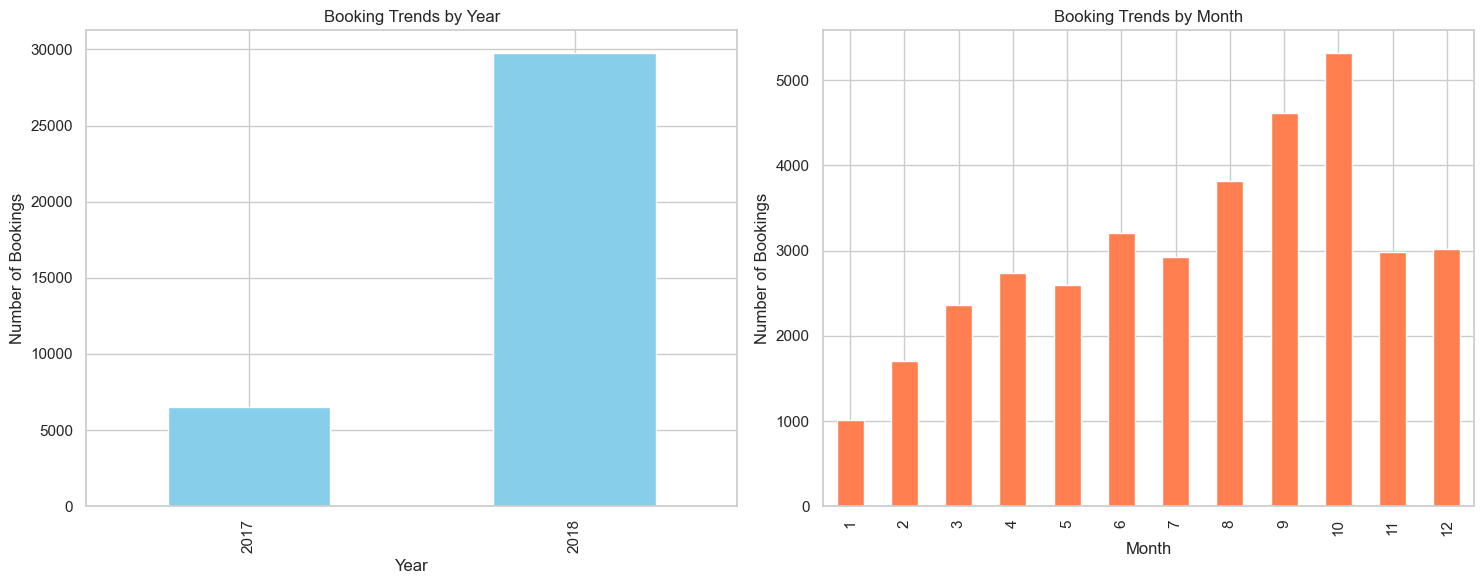

In [13]:

sns.set(style="whitegrid")

# Booking Trends Analysis
booking_trends_year = hotel.groupby('arrival_year')['Booking_ID'].count()
booking_trends_month = hotel.groupby('arrival_month')['Booking_ID'].count()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
booking_trends_year.plot(kind='bar', color='skyblue')
plt.title('Booking Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')

plt.subplot(1, 2, 2)
booking_trends_month.plot(kind='bar', color='coral')
plt.title('Booking Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

plt.tight_layout()
plt.show()


In [49]:
# distribution of bookings among different types of customers
adults_bookings = hotel.groupby('no_of_adults')['Booking_ID'].count()
children_bookings = hotel.groupby('no_of_children')['Booking_ID'].count()
repeated_guest_bookings = hotel.groupby('repeated_guest')['Booking_ID'].count()

plt.figure(figsize=(18, 6))

plt.subplot(3, 1, 1)
adults_bookings.plot(kind='bar', color='lightgreen')
plt.title('Bookings by Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Bookings')

plt.subplot(3, 1, 2)
children_bookings.plot(kind='bar', color='lightblue')
plt.title('Bookings by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Bookings')

plt.subplot(3, 1, 3)
repeated_guest_bookings.plot(kind='bar', color='salmon')
plt.title('Bookings by Repeated Guests')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Number of Bookings')

plt.tight_layout()
plt.show()


KeyError: 'Column not found: Booking_ID'

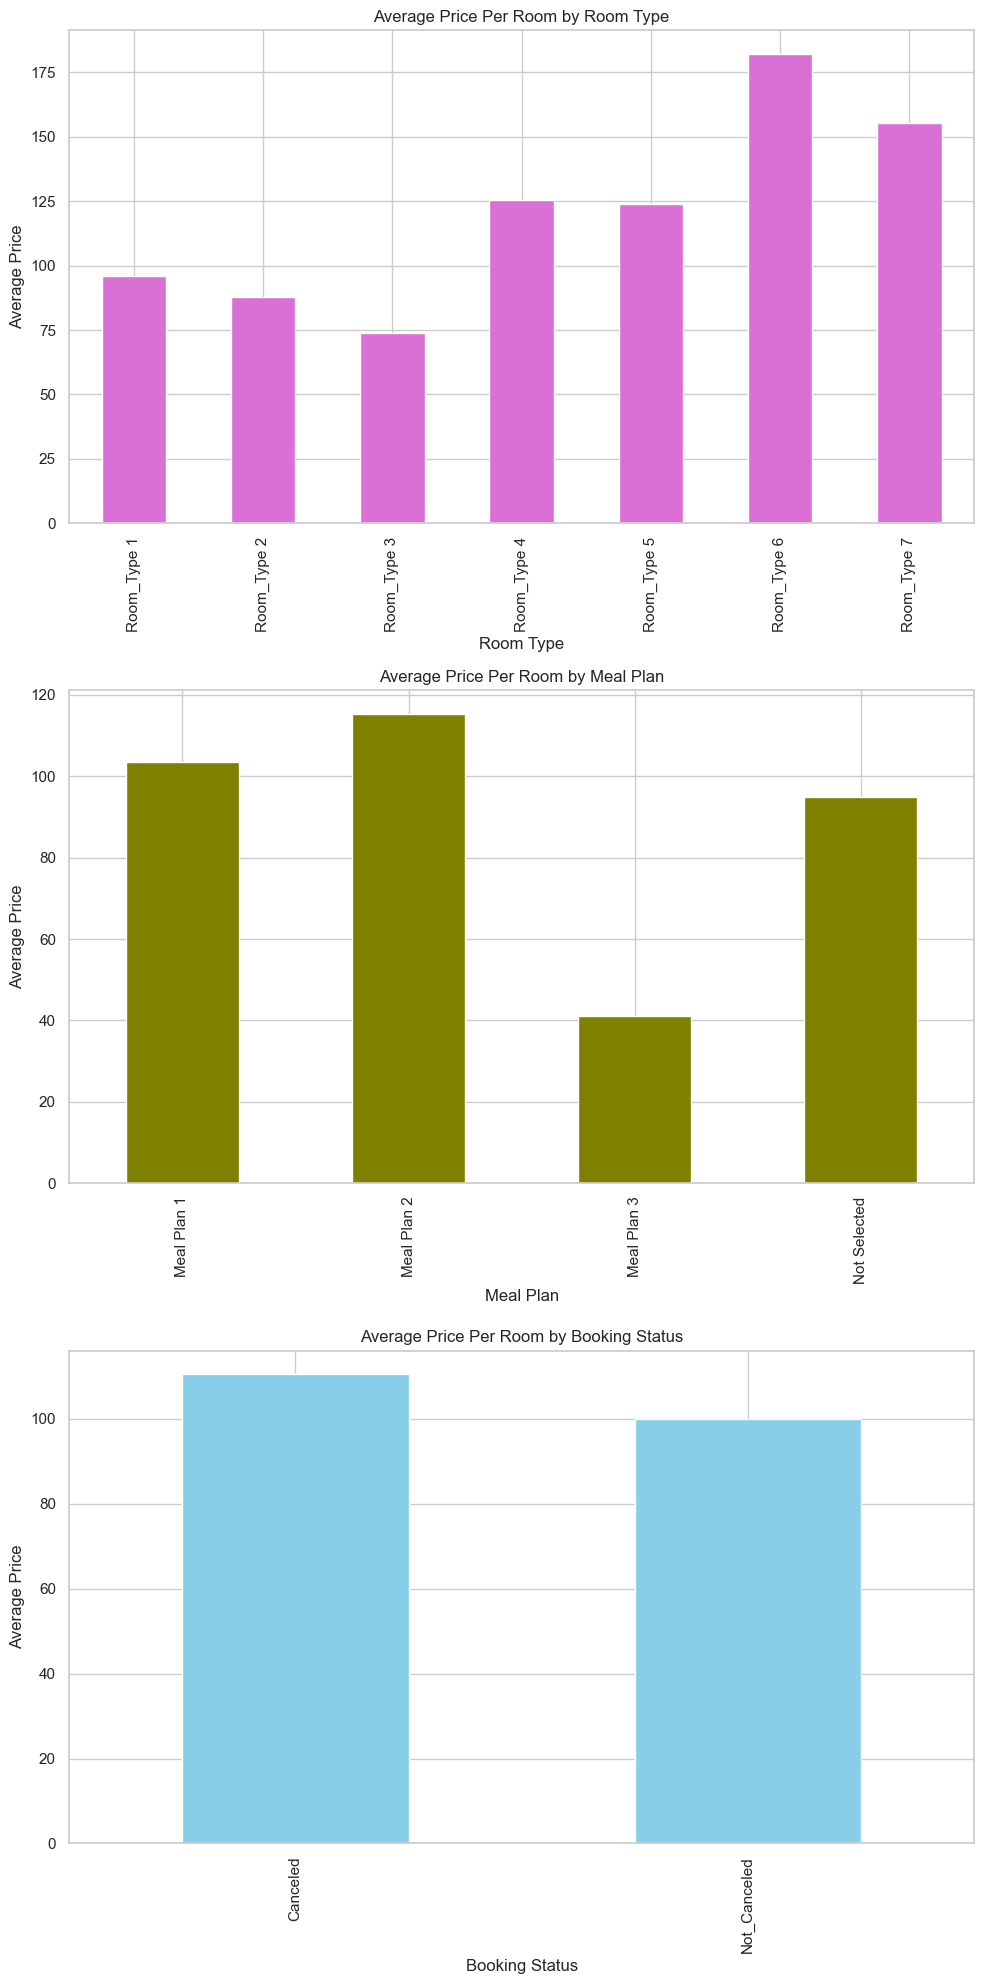

In [18]:
# 5. Price Analysis
# how the average price per room varies across different conditions
price_by_room_type = hotel.groupby('room_type_reserved')['avg_price_per_room'].mean()
price_by_meal_plan = hotel.groupby('type_of_meal_plan')['avg_price_per_room'].mean()
price_by_booking_status = hotel.groupby('booking_status')['avg_price_per_room'].mean()

plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
price_by_room_type.plot(kind='bar', color='orchid')
plt.title('Average Price Per Room by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')

plt.subplot(3, 1, 2)
price_by_meal_plan.plot(kind='bar', color='olive')
plt.title('Average Price Per Room by Meal Plan')
plt.xlabel('Meal Plan')
plt.ylabel('Average Price')

plt.subplot(3, 1, 3)
price_by_booking_status.plot(kind='bar', color='skyblue')
plt.title('Average Price Per Room by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()


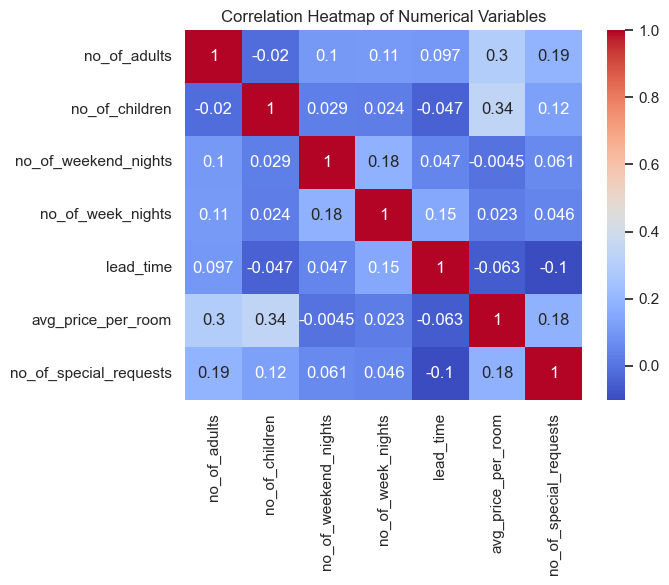

In [19]:
# 3. Correlation heatmap
sns.heatmap(hotel[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Encoding Categorical Variables

In [20]:
categorical_columns=categorical_columns.drop('Booking_ID')

In [21]:

target_encoding = {'Canceled': 1, 'Not_Canceled': 0}
hotel['booking_status_encoded'] = hotel['booking_status'].map(target_encoding)


In [22]:

# Calculating correlations
correlations = hotel.corr(numeric_only=True)['booking_status_encoded'].sort_values()
correlations

no_of_special_requests                 -0.253070
repeated_guest                         -0.107287
required_car_parking_space             -0.086185
no_of_previous_bookings_not_canceled   -0.060179
no_of_previous_cancellations           -0.033728
arrival_month                          -0.011233
arrival_date                            0.010629
no_of_children                          0.033078
no_of_weekend_nights                    0.061563
no_of_adults                            0.086920
no_of_week_nights                       0.092996
avg_price_per_room                      0.142569
arrival_year                            0.179529
lead_time                               0.438538
booking_status_encoded                  1.000000
Name: booking_status_encoded, dtype: float64

Lead time and avg_price_per_room has some degree of =ve correlation with the dataset

no_of_special_requests have a good -ve correlation

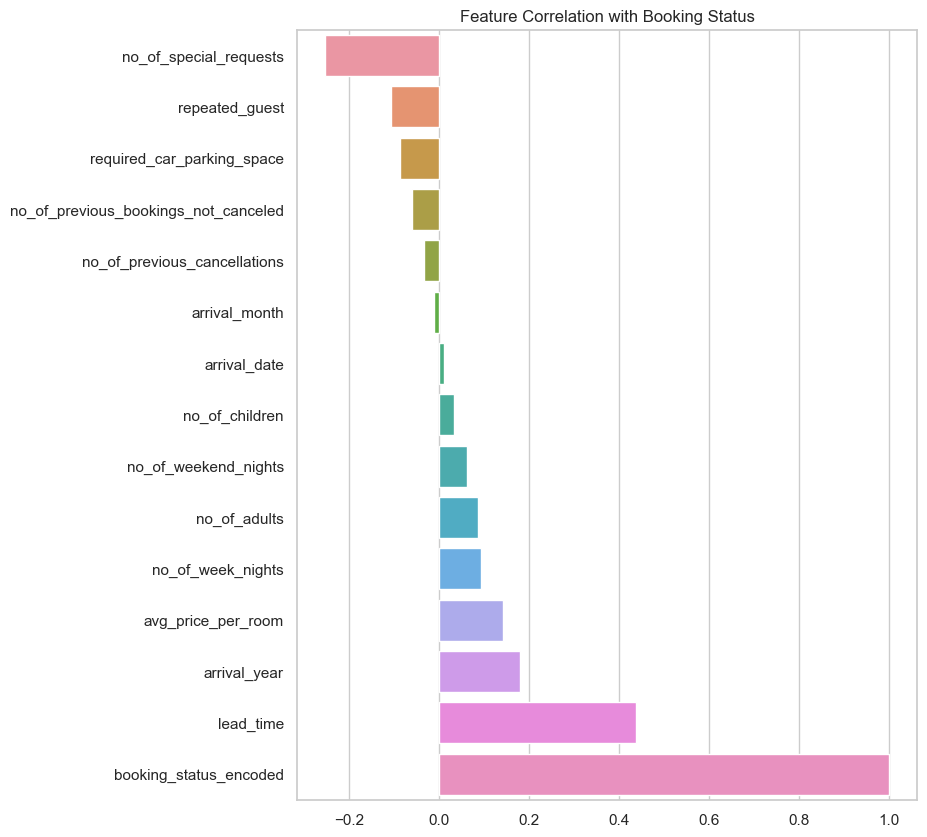

In [23]:
# Plotting the correlations
plt.figure(figsize=(8, 10))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with Booking Status')
plt.show()

In [24]:
hotel=hotel.drop(['Booking_ID','booking_status'],axis=1)

In [26]:
cat_features=hotel.select_dtypes(include=['object','category'])
hotel=pd.get_dummies(hotel,columns=cat_features.columns,dtype=int)

# Decision Tree

In [27]:
X=hotel.drop('booking_status_encoded',axis=1)
y=hotel['booking_status_encoded']

In [28]:
print(X.shape)
print(y.shape)

(36275, 30)
(36275,)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29020, 30)
(7255, 30)
(29020,)
(7255,)


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dt_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4878
           1       0.81      0.80      0.81      2377

    accuracy                           0.87      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255

[[4430  448]
 [ 465 1912]]


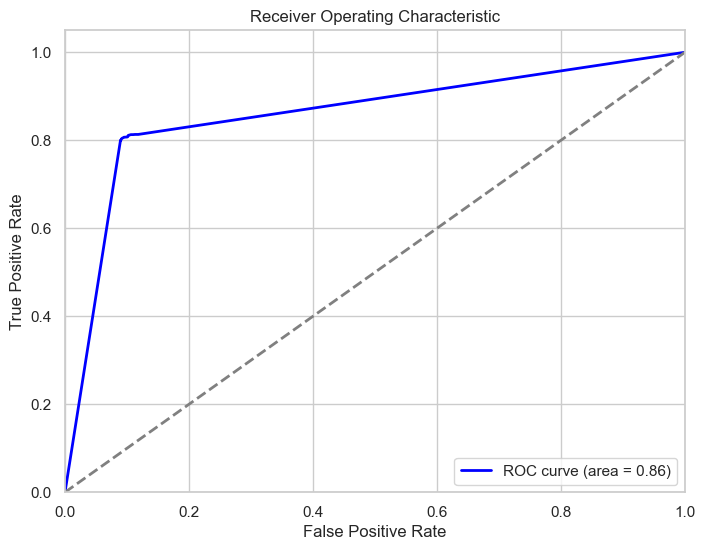

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob
                                 
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Hyper parameter tuning using Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Score:", best_score)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8715368711233633


# K- Nearest Neighbors

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN with a chosen K, e.g., K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4878
           1       0.79      0.75      0.77      2377

    accuracy                           0.85      7255
   macro avg       0.84      0.83      0.83      7255
weighted avg       0.85      0.85      0.85      7255

[[4419  459]
 [ 603 1774]]


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#  parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Score:", best_score)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best Score: 0.8722949689869056


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # probabilities for ROC-AUC

# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      4878
           1       0.75      0.64      0.69      2377

    accuracy                           0.81      7255
   macro avg       0.80      0.77      0.78      7255
weighted avg       0.81      0.81      0.81      7255

Confusion Matrix:
 [[4377  501]
 [ 845 1532]]
ROC-AUC Score: 0.8709147282890582


# XGBOOST

In [38]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [39]:

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      4878
           1       0.87      0.81      0.84      2377

    accuracy                           0.90      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.90      0.90      0.90      7255

Confusion Matrix:
 [[4588  290]
 [ 457 1920]]
ROC-AUC Score: 0.9560955380273197
